In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from time import time
import torch
from mpl_toolkits.mplot3d import Axes3D
from src.utils.grid_thinning.grid_sampling_functionalities import GridSampling, spherical_to_cartesian, sample_data
from src.utils.grid_thinning.thinning_strategies import thin_all_species, thin_majority_species

In [2]:
po_dataset_path = "/shares/wegner.ics.uzh/glc23_data/Presences_only_train.csv"
po_dataset = pd.read_csv(po_dataset_path, sep=";")

# 3D spatial sampling

In [11]:
grid_size = 1
dataset = po_dataset.copy()
radius_earth = 6731
# Extract longitude and latitude from the DataFrame
lon = dataset['lon'].values
lat = dataset['lat'].values

# Convert spherical coordinates to Cartesian coordinates
x, y, z = spherical_to_cartesian(lon, lat, radius_earth)

coordinates = torch.stack(
        [torch.tensor(x), torch.tensor(y), torch.tensor(z)],
        dim=1
    )

sampler = GridSampling3D(grid_size)
indices, cluster_density = sampler(coordinates)

In [3]:
species_data = po_dataset[po_dataset["speciesId"] == 1995].copy()
species_thinned_data, cluster_density = sample_data(species_data, 1)
s1 = pd.Series(index=species_data.index, data=cluster_density, name='cluster_density_1995')

In [5]:
species_data = po_dataset[po_dataset["speciesId"] == 729].copy()
species_thinned_data, cluster_density = sample_data(species_data, 1)
s2 = pd.Series(index=species_data.index, data=cluster_density, name='cluster_density_729')

In [6]:
df = po_dataset[po_dataset["speciesId"].isin([1995, 729])].copy()

In [7]:
densities = pd.concat([s1, s2])

In [8]:
len(set(df.index).intersection(set(densities.index)))

9095

In [9]:
densities.values

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
sampled_species_counts = df["speciesId"].value_counts()
                
class_weights =  [
    1/sampled_species_counts[i] for i in\
    df["speciesId"].values
]

In [11]:
data_train = df.merge(right=densities.rename("cluster_density"), right_index=True, left_index=True)
cluster_density = data_train["cluster_density"].values

In [12]:
class_weights/cluster_density

array([0.00021993, 0.00021993, 0.00021993, ..., 0.00021988, 0.00021988,
       0.00021988])

In [ ]:
assert(len(data_train)==len(cluster_density))
assert(len(set(data_train.index)-set(cluster_density.index))==0)

data_train = data_train.merge(
    cluster_density.rename("cluster_density"),
    left_index=True,
    right_index=True
)

cluster_density = data_train["cluster_density"].values
assert(len(class_weights)==len(cluster_density))

sample_weights = class_weights/cluster_density

In [4]:
df = po_dataset.head(1000000)
data, cluster_densities = thin_all_species(df, thin_dist=2)

Start thinning of 5930 species...
Thinned speciesId 200/5930 in 0.0077 seconds.
Thinned speciesId 400/5930 in 0.0022 seconds.
Thinned speciesId 600/5930 in 0.002 seconds.
Thinned speciesId 800/5930 in 0.0056 seconds.
Thinned speciesId 1000/5930 in 0.0033 seconds.
Thinned speciesId 1200/5930 in 0.0016 seconds.
Thinned speciesId 1400/5930 in 0.0014 seconds.
Thinned speciesId 1600/5930 in 0.0015 seconds.
Thinned speciesId 1800/5930 in 0.0018 seconds.
Thinned speciesId 2000/5930 in 0.0016 seconds.
Thinned speciesId 2200/5930 in 0.0015 seconds.
Thinned speciesId 2400/5930 in 0.0034 seconds.
Thinned speciesId 2600/5930 in 0.0039 seconds.
Thinned speciesId 2800/5930 in 0.0016 seconds.
Thinned speciesId 3000/5930 in 0.0023 seconds.
Thinned speciesId 3200/5930 in 0.0021 seconds.
Thinned speciesId 3400/5930 in 0.0013 seconds.
Thinned speciesId 3600/5930 in 0.0015 seconds.
Thinned speciesId 3800/5930 in 0.0014 seconds.
Thinned speciesId 4000/5930 in 0.0017 seconds.
Thinned speciesId 4200/5930 in 

In [5]:
data_maj, cluster_densities_maj = thin_majority_species(df)

Start thinning of 1488 majority species...
Thinned species 100/1488)
Thinned species 200/1488)
Thinned species 300/1488)
Thinned species 400/1488)
Thinned species 500/1488)
Thinned species 600/1488)
Thinned species 700/1488)
Thinned species 800/1488)
Thinned species 900/1488)
Thinned species 1000/1488)
Thinned species 1100/1488)
Thinned species 1200/1488)
Thinned species 1300/1488)
Thinned species 1400/1488)
Completed thinning the data in 7.3902 s.


In [19]:
df = po_dataset.copy()
data_maj, cluster_densities_maj = thin_majority_species(df, thin_dist=5)

Start thinning of 3077 majority species...
Thinned species 100/3077)
Thinned species 200/3077)
Thinned species 300/3077)
Thinned species 400/3077)
Thinned species 500/3077)
Thinned species 600/3077)
Thinned species 700/3077)
Thinned species 800/3077)
Thinned species 900/3077)
Thinned species 1000/3077)
Thinned species 1100/3077)
Thinned species 1200/3077)
Thinned species 1300/3077)
Thinned species 1400/3077)
Thinned species 1500/3077)
Thinned species 1600/3077)
Thinned species 1700/3077)
Thinned species 1800/3077)
Thinned species 1900/3077)
Thinned species 2000/3077)
Thinned species 2100/3077)
Thinned species 2200/3077)
Thinned species 2300/3077)
Thinned species 2400/3077)
Thinned species 2500/3077)
Thinned species 2600/3077)
Thinned species 2700/3077)
Thinned species 2800/3077)
Thinned species 2900/3077)
Thinned species 3000/3077)
Completed thinning the data in 46.6381 s.


In [ ]:
# Plot original coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], c='b', label='Original Coordinates')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Plot processed coordinates
ax.scatter(processed_coordinates[:, 0], processed_coordinates[:, 1], processed_coordinates[:, 2], c='r', label='Processed Coordinates')
ax.legend()

plt.show()

## Per species

In [15]:
from src.utils.grid_thinning.grid_sampling_functionalities import sample_data
from shapely.geometry import Point
import geopandas as gpd

In [43]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [20]:
grid_size = 50
radius_earth = 6371
speciesid = 1995

data = po_dataset.loc[po_dataset["speciesId"]==speciesid].copy()
data.drop_duplicates(subset=['x_EPSG3035', 'y_EPSG3035'], inplace=True)

data['geometry'] = [Point(x, y) for x, y in zip(data['x_EPSG3035'], data['y_EPSG3035'])]
gdata = gpd.GeoDataFrame(data, geometry='geometry', crs='EPSG:3035')

processed_data, _ = sample_data(gdata, grid_size, radius_earth)

In [30]:
font_size=8
plt.rcParams.update({
        'font.size': font_size,
        'axes.titlesize': font_size,
        'axes.labelsize': font_size,
        'xtick.labelsize': font_size,
        'ytick.labelsize': font_size,
        'legend.fontsize': font_size,
        'figure.titlesize': font_size
    })

np.random.seed(0)
# Generate a color palette with as many colors as the number of plots needed
colors = plt.get_cmap('Set3').colors

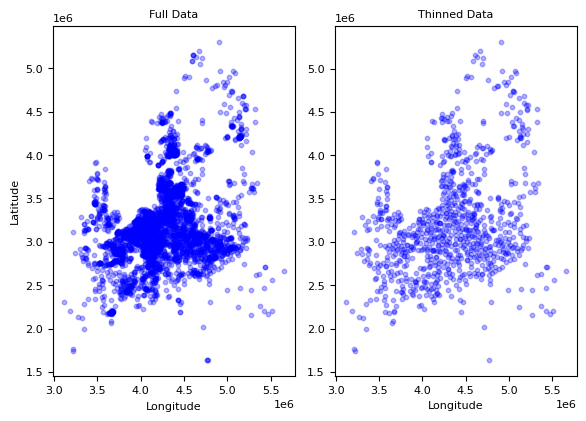

In [52]:
fig, axs = plt.subplots(1, 2, figsize=set_size(width=426.790, subplots=(2,1)))

# Plot all points in the GeoDataFrame on the first subplot
gdata.plot(ax=axs[0], markersize=10, color='blue', alpha=0.3, label='full data')
axs[0].set_title('Full Data')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Plot points for the specific species ID on the second subplot
processed_data.plot(ax=axs[1], markersize=10, color='blue', alpha=0.3, label='thinned data')
axs[1].set_title('Thinned Data')
axs[1].set_xlabel('Longitude')

# Show the plots
plt.tight_layout()
plt.savefig("plots/thinning_dist.png", dpi=300)

plt.show()

# 20D Sampling in the bioclimatic space

In [1]:
from torch_cluster import grid_cluster
from torch_geometric.nn.pool.consecutive import consecutive_cluster
from src.data.datasets.glc_po import GLCPODataset
from src.data.predictors.point_bioclim import PointwiseBioclimEuropePredictor
from src.data.predictors.loc import LocationPredictor
import torch
from torch.utils.data import DataLoader, WeightedRandomSampler
from src.utils.grid_thinning.thinning_strategies import (
    thin_all_species,
    thin_majority_species,
    thin_majority_minority_species, 
    thin_bioclim_all_species
)
from src.utils.grid_thinning.grid_sampling_functionalities import sample_data, sample_bioclim_data
import pandas as pd

In [2]:
import numpy as np

In [3]:
bioclim_path = "/shares/wegner.ics.uzh/glc23_data/bioclim+elev/bioclim_elevation_scaled_europe.npy"
po_dataset_path = "/shares/wegner.ics.uzh/glc23_data/Presences_only_train.csv"

bioclim = PointwiseBioclimEuropePredictor(bioclim_path)
loc = LocationPredictor()

predictors = {"loc_cyclical_europe": loc, 
             "bioclim_pointwise_europe": bioclim}

data_train = GLCPODataset(
   predictors,
   po_dataset_path
)

In [4]:
speciesid=7466
species_thinned_data, cluster_density = sample_bioclim_data(data_train, speciesid, grid_size=1)

tensor([7, 5, 9, 3, 8])
5


In [5]:
species_thinned_data["speciesId"]

4907940    7466
4907744    7466
4908256    7466
4907735    7466
4908153    7466
Name: speciesId, dtype: int64

In [5]:
df = data_train.data.copy()
species_data = df[df["speciesId"]==speciesid].copy()

In [6]:
species_thinned_data, cluster_density = sample_data(species_data, grid_size=1)

tensor([3, 1, 5, 2, 4, 7, 6, 8, 9])


In [6]:
data_train.data.iloc[[4907720, 4907721, 4907728, 4907735, 4907738, 4907744, 4907910, 4907940,
       4908153, 4908256], data_train.data["speciesId"]]

IndexError: positional indexers are out-of-bounds

In [ ]:
data_train

In [7]:
species_thinned_data

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
7,1797028,3.952319e+09,NaN,Pl@ntNet automatic,2019-07-29,210,2019,-10.46649,52.14950,2941391.0,3422495.0,24.0,5020,3018876,1007
5,2281420,3.951475e+09,NaN,Pl@ntNet automatic,2021-07-07,188,2021,-10.47352,52.15065,2940968.0,3422752.0,6.0,3479,3018874,1005
9,1768174,3.955862e+09,NaN,Pl@ntNet automatic,2021-08-27,239,2021,-10.46618,52.14698,2941333.0,3422218.0,21.0,5020,3018878,1009
3,1800638,2.294436e+09,gsauce,iNaturalist RG,2019-07-02,183,2019,-10.47555,52.15074,2940838.0,3422801.0,6.0,5783,3018872,1003
8,4639581,3.957127e+09,NaN,Pl@ntNet automatic,2019-07-29,210,2019,-10.46634,52.14962,2941405.0,3422505.0,12.0,1170,3018877,1008


In [53]:
species_data = data_train.data[data_train.data["speciesId"]==7466].copy()
species_thinned_data, cluster_density = sample_data(species_data, grid_size=1)

NameError: name 'data_train' is not defined

In [11]:
species_thinned_data

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
4907735,3311172,2.012958e+09,torillomo,iNaturalist RG,2019-02-28,59,2019,33.01006,34.59289,6420707.0,1598832.0,5.0,7466,6999957,3979751
4907721,4070871,2.012958e+09,ibazos,iNaturalist RG,2019-02-28,59,2019,33.00674,34.60025,6420207.0,1599525.0,9.0,7466,6999944,3979738
4907744,2944033,2.012958e+09,ibazos,iNaturalist RG,2019-02-28,59,2019,33.01102,34.64105,6419431.0,1603993.0,14.0,7466,6999966,3979760
4907728,3996924,1.453474e+09,Quentin Groom,iNaturalist RG,2017-03-02,61,2017,33.00874,34.63644,6419361.0,1603439.0,10.0,7466,6999951,3979745
4907738,2671178,2.012958e+09,Dariusz Kamiński,iNaturalist RG,2019-02-28,59,2019,33.01018,34.64269,6419311.0,1604145.0,44.0,7466,6999960,3979754
4907940,85226,2.542881e+09,Stuart Roberts,iNaturalist RG,2019-03-05,64,2019,33.22930,34.70667,6436787.0,1616980.0,5.0,7466,7000153,3979947
4907910,751218,1.453476e+09,Quentin Groom,iNaturalist RG,2017-03-03,62,2017,33.16861,34.71184,6431300.0,1615860.0,30.0,7466,7000124,3979918
4908153,4597006,2.235473e+09,Jurga Motiejūnaitė,iNaturalist RG,2019-02-22,53,2019,33.63134,34.89222,6466726.0,1647915.0,38.0,7466,7000364,3980158
4908256,4785055,1.993737e+09,George Constantinou,iNaturalist RG,2019-02-03,34,2019,34.02145,34.97825,6498313.0,1668073.0,5.0,7466,7000467,3980261


In [30]:
# Extract bioclim_pointwise_europe tensors from all samples using list comprehension
data_train.data = data_train.data.sample(100000)
timer = time()
bioclim_tensors = [sample['bioclim_pointwise_europe'] for sample in data_train]
print(time() - timer)
coordinates = torch.stack(bioclim_tensors,dim=0)

70.42018222808838


In [32]:
grid_size=2

# Convert point coordinates to the voxel grid coordinates
# aixo es una normalització en les tres dimensions
coords = torch.round(coordinates / grid_size)

# Match each point with a voxel identifier
# desfa el 3D i dona només un identifier per voxel (i ens és igual l'ordre)
# de cada voxel es queda només amb l'últim punt
cluster = grid_cluster(coords, torch.ones(20, device=coords.device))

In [33]:
# Reindex the clusters to make sure the indices used are
# consecutive. Basically, we do not want cluster indices to span
# [0, i_max] without all in-between indices to be used, because
# this will affect the speed and output size of torch_scatter
# operations
cluster, unique_pos_indices = consecutive_cluster(cluster)

cluster_unique_counts = cluster.unique(return_counts=True)[1]

cluster_ordered_counts = [cluster_unique_counts[i].item() for i in cluster]

In [ ]:
# Use unique_pos_indices to pick values from a single point
# within each cluster
#xyz = xyz[unique_pos_indices]

return unique_pos_indices, cluster_ordered_counts

In [ ]:
# Apply grid sampling
sampler = GridSampling3D(grid_size)
sampled_data_indices, cluster_density = sampler(coordinates)

#data["cluster_density"] = cluster_density
sampled_data = data.iloc[sampled_data_indices].copy()

In [14]:
# Extract longitude and latitude from the DataFrame
lon = data_train.data['lon'].values
lat = data_train.data['lat'].values

# Convert spherical coordinates to Cartesian coordinates
x, y, z = spherical_to_cartesian(lon, lat, radius_earth=6731)
coordinates = torch.stack(
    [torch.tensor(x), torch.tensor(y), torch.tensor(z)],
    dim=1
)

In [ ]:
class GridSampling3D:
    """ Clusters 3D points into voxels with size :attr:`size`.

    By default, only the last-encountered element of each voxel will be
    kept.

    Parameters
    ----------
    size: float
        Size of a voxel (in each dimension).
    shuffle: bool
        Whether the data should be shuffled before the voxelization.
        Keep to False for deterministic results.
    """

    def __init__(self, size, shuffle=False):
        self.grid_size = size
        # shuffle to avoid that the same point is picked every time I run the script
        self.shuffle = shuffle

    @property
    def _repr_dict(self):
        return {k: v for k, v in self.__dict__.items()}

    def __repr__(self):
        attr_repr = ', '.join([f'{k}={v}' for k, v in self._repr_dict.items()])
        return f'{self.__class__.__name__}({attr_repr})'

    def __call__(self, xyz):
        # If 'shuffle' is True, shuffle the points order.
        # Note that voxelization of point attributes will be stochastic
        if self.shuffle:
            idx = torch.randperm(xyz.shape[0], device=xyz.device)
            xyz = xyz[idx]

        # Convert point coordinates to the voxel grid coordinates
        # aixo  es una normalització en les tres dimensions
        coords = torch.round(xyz / self.grid_size)

        # Match each point with a voxel identifier
        # desfa el 3D i dona només un identifier per voxel (i ens és igual l'ordre)
        # de cada voxel es queda només amb l'últim punt
        cluster = grid_cluster(coords, torch.ones(3, device=coords.device))

        # Reindex the clusters to make sure the indices used are
        # consecutive. Basically, we do not want cluster indices to span
        # [0, i_max] without all in-between indices to be used, because
        # this will affect the speed and output size of torch_scatter
        # operations
        cluster, unique_pos_indices = consecutive_cluster(cluster)
        
        cluster_unique_counts = cluster.unique(return_counts=True)[1]

        cluster_ordered_counts = [cluster_unique_counts[i].item() for i in cluster]

        # Use unique_pos_indices to pick values from a single point
        # within each cluster
        #xyz = xyz[unique_pos_indices]

        return unique_pos_indices, cluster_ordered_counts

In [ ]:
def spherical_to_cartesian(lon, lat, radius_earth):
    lon_rad = np.deg2rad(lon)
    lat_rad = np.deg2rad(lat)
    
    x = radius_earth * np.cos(lat_rad) * np.cos(lon_rad)
    y = radius_earth * np.cos(lat_rad) * np.sin(lon_rad)
    z = radius_earth * np.sin(lat_rad)
    
    return x, y, z

def sample_data(data, grid_size, radius_earth=6371):
    # Load the dataset using pd.read_csv()
    #dataset = pd.read_csv(csv_file, sep=";")
    #data = dataset[dataset["speciesid"]==speciesid].copy()
    
    # Extract longitude and latitude from the DataFrame
    lon = data['lon'].values
    lat = data['lat'].values
    
    # Convert spherical coordinates to Cartesian coordinates
    x, y, z = spherical_to_cartesian(lon, lat, radius_earth)
    coordinates = torch.stack(
        [torch.tensor(x), torch.tensor(y), torch.tensor(z)],
        dim=1
    )
    
    # Apply grid sampling
    sampler = GridSampling3D(grid_size)
    sampled_data_indices, cluster_density = sampler(coordinates)
    
    #data["cluster_density"] = cluster_density
    sampled_data = data.iloc[sampled_data_indices].copy()

    return sampled_data, cluster_density

In [ ]:
bioclim_tenros

In [ ]:
def sample_data(data, grid_size, radius_earth=6371):
    # Load the dataset using pd.read_csv()
    #dataset = pd.read_csv(csv_file, sep=";")
    #data = dataset[dataset["speciesid"]==speciesid].copy()
    
    # Extract longitude and latitude from the DataFrame
    lon = data['lon'].values
    lat = data['lat'].values
    
    # Convert spherical coordinates to Cartesian coordinates
    x, y, z = spherical_to_cartesian(lon, lat, radius_earth)
    coordinates = torch.stack(
        [torch.tensor(x), torch.tensor(y), torch.tensor(z)],
        dim=1
    )
    
    # Apply grid sampling
    sampler = GridSampling3D(grid_size)
    sampled_data_indices, cluster_density = sampler(coordinates)
    
    #data["cluster_density"] = cluster_density
    sampled_data = data.iloc[sampled_data_indices].copy()

    return sampled_data, cluster_density

In [25]:
data_train[0]

{'loc_cyclical_europe': tensor([-10.5390,  51.7719]),
 'bioclim_pointwise_europe': tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.8979,
          0.0000,  0.0000,  0.0000,  0.0000], dtype=torch.float16),
 'y': tensor([0., 0., 0.,  ..., 0., 0., 0.])}

In [9]:
df = data_train.data
speciesid=1995
species_data = df.loc[df["speciesId"]==speciesid].copy()

In [10]:
species_thinned_data, cluster_density = sample_data(
    species_data,
    thin_dist=1
)

IndentationError: unexpected indent (3637149299.py, line 2)

In [ ]:
data_train.data, _ = thin_all_species(
    df=data_train.data, 
    thin_dist=1
    )

In [4]:
path = "./data/bioclim_thinned"
t001 = pd.read_csv(f"{path}/dist_0.01.csv", sep=";")
t01 = pd.read_csv(f"{path}/dist_0.1.csv", sep=";")
t1 = pd.read_csv(f"{path}/dist_1.csv", sep=";")

In [5]:
t001["speciesId"].nunique()

822

In [7]:
po_dataset_path = "/shares/wegner.ics.uzh/glc23_data/Presences_only_train.csv"
po_dataset = pd.read_csv(po_dataset_path, sep=";")

In [8]:
species_counts = po_dataset["speciesId"].value_counts()
filtered_species = species_counts\
    [species_counts >= 10].index.tolist()
filtered_po_dataset = po_dataset\
    [po_dataset["speciesId"].isin(filtered_species)]

In [11]:
filtered_po_dataset["speciesId"].value_counts()

speciesId
1995    4548
729     4547
8101    4547
4933    4547
7047    4546
        ... 
9232      10
8674      10
5708      10
4005      10
7466      10
Name: count, Length: 5697, dtype: int64

In [12]:
t01.loc[t01["speciesId"]==7466]

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID


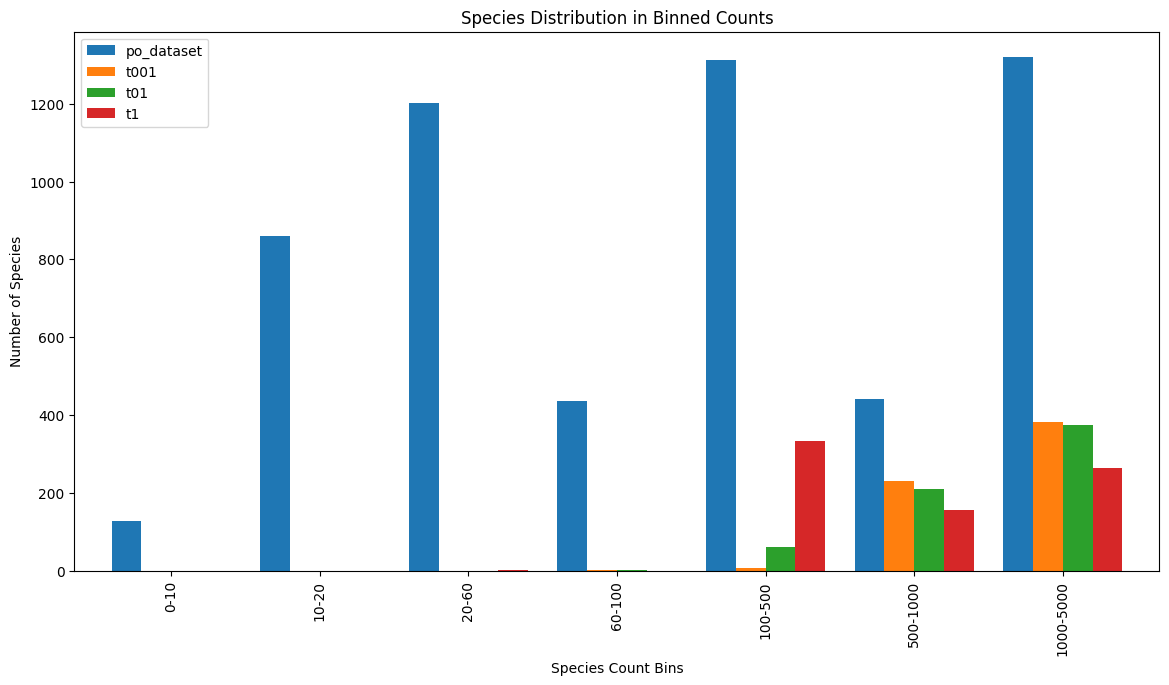

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming po_dataset, t01, t001, and t1 are already defined and loaded DataFrames

# Define bins and labels
bins = [0, 10, 20, 60, 100, 500, 1000, 5000]
labels = [f'{start}-{end}' for start, end in zip(bins[:-1], bins[1:])]

# List of datasets with their names
datasets = {
    'po_dataset': po_dataset,
    't001': t001,
    't01': t01,
    't1': t1
}

# Dictionary to hold the value counts for each dataset
value_counts_dict = {}

# Calculate value counts for each dataset and bin them
for name, dataset in datasets.items():
    species_counts = dataset["speciesId"].value_counts()
    grouped_species_ids = pd.cut(species_counts, bins=bins, labels=labels)
    value_counts_dict[name] = grouped_species_ids.value_counts().sort_index()

# Create a DataFrame for plotting
df = pd.DataFrame(value_counts_dict)

# Plot the data
ax = df.plot(kind="bar", width=0.8, figsize=(14, 7))

# Set labels and title
ax.set_xlabel('Species Count Bins')
ax.set_ylabel('Number of Species')
ax.set_title('Species Distribution in Binned Counts')

# Show plot
plt.show()

In [36]:
len(set(t1["speciesId"]))

822

In [35]:
len(set(t001["speciesId"]))

822

In [37]:
len(set(t01["speciesId"]))

822

In [ ]:
len(set)

In [40]:
len(t01)

3929837

In [39]:
len(t1)

1765640

<Axes: xlabel='count'>

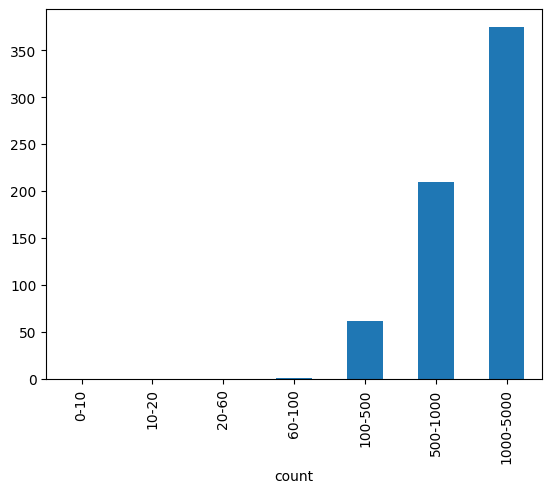

In [12]:
bins = [0, 10, 20, 60, 100, 500, 1000, 5000]
species_counts = t01["speciesId"].value_counts()
grouped_species_ids = pd.cut(species_counts, bins=bins, labels=[f'{start}-{end}' for start, end in zip(bins[:-1], bins[1:])])
grouped_species_ids.value_counts().sort_index().plot(kind="bar")

In [13]:
grouped_species_ids.value_counts().sort_index()

count
0-10           0
10-20          0
20-60          0
60-100         1
100-500       62
500-1000     210
1000-5000    375
Name: count, dtype: int64

In [16]:
len(set(t1["speciesId"]).intersection(set(t001["speciesId"])))

822

In [51]:
path = "/shares/wegner.ics.uzh/glc23_data/thinned_data/thin_all/dist_3000.csv"
t = pd.read_csv(path, sep=";")

In [52]:
t["speciesId"].nunique()

10038

In [6]:
po_dataset["speciesId"].nunique()

10038

In [10]:
filtered_po_dataset["speciesId"].nunique()

5697